In [1]:
!pip install import-ipynb
import import_ipynb
import HeatCurrentFunctions as QH

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc


Jm = QH.sm1 + QH.sm2
Jp = QH.sp1 + QH.sp2

w0 = 1          # LC resonator frequency (sets the unit scale)
Qf = 7.1798      # Resonator quality factor

# Bath coupling strengths
gamma_h   = 0.0075   # Hot bath
gamma_c   = 0.0075   # Cold bath
gamma_local = 0.001 #0.001   # Parasitic relaxation
gamma_deph  = 0.001  # Pure dephasing (σ_z)

# Temperatures  (ℏ = k_B = 1)
T_local = 0.186    # Parasitic bath, 50 mK
T_h     = 1.2087    # Hot bath, 350 mK
T_c     = 0.186   # Cold bath, 50 mK
N=50

# Diagnostic: effective temperature of the composite resonator bath
Ts = QH.T_star(T_c, gamma_c, T_h, gamma_h, w0)
print("T* =", Ts)



T* = 0.7877024107695236


In [5]:
# -------------------------------------------------------------------
# Frequency grid and heat-current maps
# -------------------------------------------------------------------
w_vals = np.linspace(0.5, 1.5, N)
W1, W2 = np.meshgrid(w_vals, w_vals)

Q_ind_O   = np.zeros_like(W1)   # independent current
Q_coll_O  = np.zeros_like(W1)   # collective current
Ratio_O   = np.zeros_like(W1)   # enhancement factor
Lambda_O  = np.zeros_like(W1)   # minimum eigenvalue (positivity check)
Rho_ind_O = np.zeros_like(W1)
Rho_coll_O = np.zeros_like(W1)

for i, w1 in enumerate(w_vals):
    for j, w2 in enumerate(w_vals):

        # Independent-bath steady state and current
        rho_ind = QH.rho_ss_termic_indepentend(
            w1, w2,
            gamma_local, T_local, gamma_deph,
            T_h, gamma_h, T_c, gamma_c,
            w0, Qf
        )
        Rho_ind_O[j, i] = np.real(rho_ind[1][1])
        Q_ind_O[j, i] = QH.Current_ind(w1, w2, rho_ind, T_h, gamma_h, w0, Qf)

        # Collective-bath steady state and current
        rho_coll = QH.rho_ss_termic_collective(
            w1, w2,
            gamma_local, T_local, gamma_deph,
            T_h, gamma_h, T_c, gamma_c,
            w0, Qf
        )
        Rho_coll_O[j, i] = np.real(rho_coll[1][2])
        Q_coll_O[j, i] = QH.Current_coll(w1, w2, rho_coll, T_h, gamma_h, w0, Qf, Jm, Jp)

        # Diagnostics
        Lambda_O[j, i] = np.min(np.linalg.eigvalsh(rho_coll.full()))
        Ratio_O[j, i]  = Q_coll_O[j, i] / Q_ind_O[j, i]

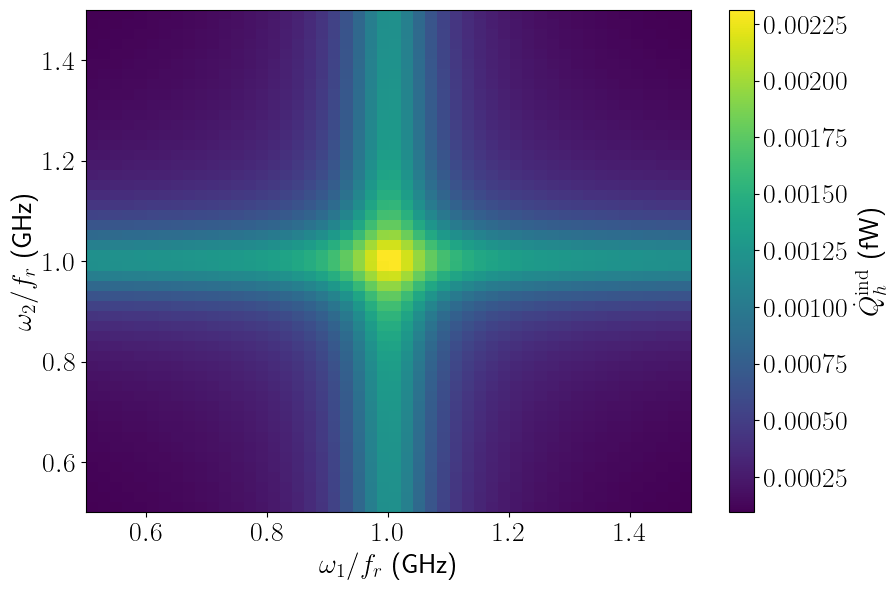

In [6]:
# Plotting Independent Heat Current for a Normalized Frequency Sweep
plt.figure(figsize=(9, 6))
rc('text',usetex=True)

cp = plt.imshow(
    0.662607015*(Q_ind_O), 
    extent=(w_vals.min(), w_vals.max(), w_vals.min(), w_vals.max()),
    aspect='auto',
    origin='lower'
)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel(r'$\omega_1/f_r$ (GHz)', fontsize=20)
plt.ylabel(r'$\omega_2/f_r$ (GHz)', fontsize=20)

cbar = plt.colorbar(cp)
# Imposto la label con fontsize
cbar.set_label(r'$\dot Q^{\rm ind}_h$ (fW)', fontsize=20)
# Regolo la dimensione dei tick
cbar.ax.tick_params(labelsize=20)

plt.tight_layout()

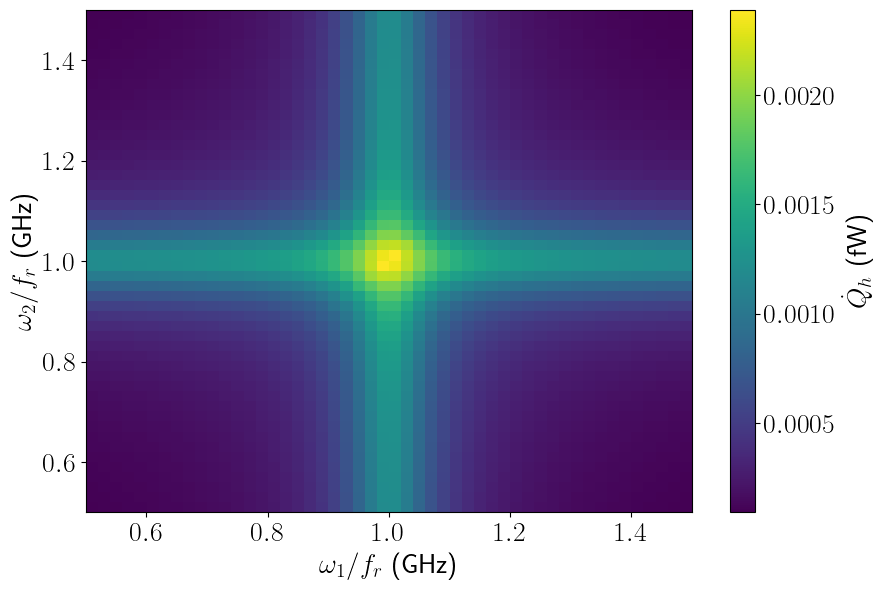

In [7]:
# Plotting Collective Heat Current for a Normalized Frequency Sweep

plt.figure(figsize=(9, 6))
rc('text',usetex=True)

cp = plt.imshow(
    0.662607015*(Q_coll_O),  # negative heat current for display
    extent=(w_vals.min(), w_vals.max(), w_vals.min(), w_vals.max()),
    aspect='auto',
    origin='lower'
)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel(r'$\omega_1/f_r$ (GHz)', fontsize=20)
plt.ylabel(r'$\omega_2/f_r$ (GHz)', fontsize=20)

cbar = plt.colorbar(cp)
# Imposto la label con fontsize
cbar.set_label(r'$\dot Q_h$ (fW)', fontsize=20)
# Regolo la dimensione dei tick
cbar.ax.tick_params(labelsize=20)
plt.tight_layout()

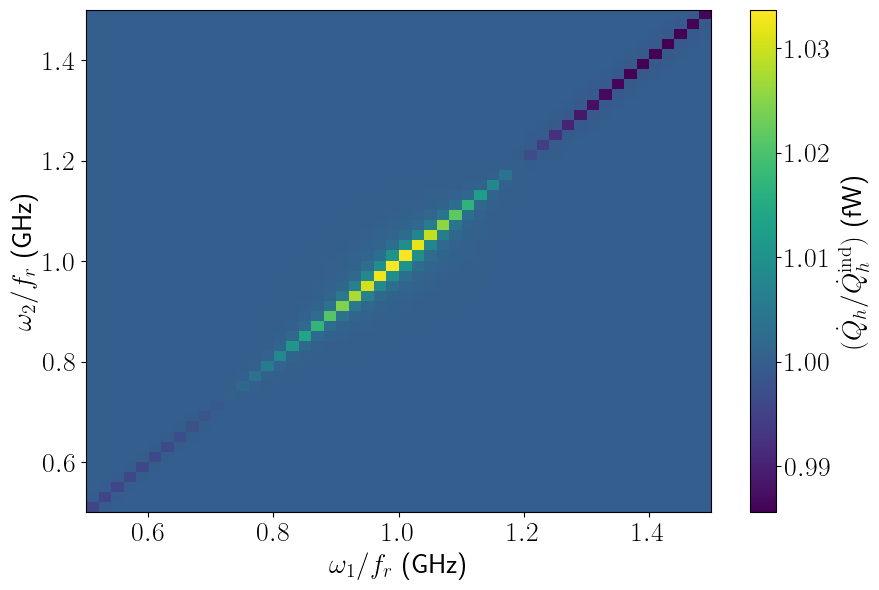

In [9]:
# Plotting the Ratio of Independent and Collective Heat Current for a Normalized Frequency Sweep

plt.figure(figsize=(9, 6))
rc('text',usetex=True)

cp = plt.imshow(
    Ratio_O,  
    extent=(w_vals.min(), w_vals.max(), w_vals.min(), w_vals.max()),
    aspect='auto',
    origin='lower'
)


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.xlabel(r'$\omega_1/f_r$ (GHz)', fontsize=20)
plt.ylabel(r'$\omega_2/f_r$ (GHz)', fontsize=20)



# Catturo la colorbar in 'cbar'
cbar = plt.colorbar(cp)
# Imposto la label con fontsize
cbar.set_label(r'$(\dot Q_h/\dot Q_h^{\rm ind})$ (fW)', fontsize=20)
# Regolo la dimensione dei tick
cbar.ax.tick_params(labelsize=20)

plt.tight_layout()

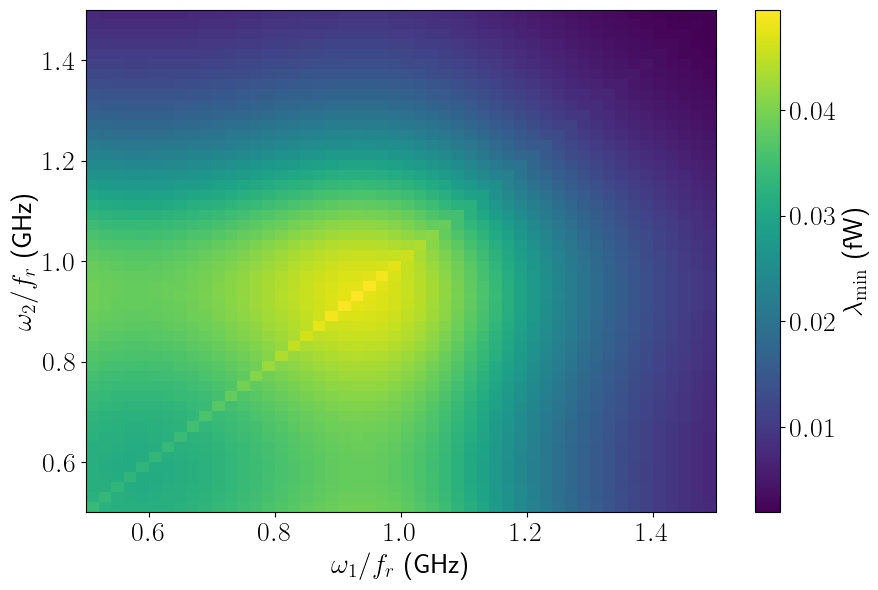

In [11]:
# Minimum Eigenvalue for the Collective Density Matrix for a Frequency Sweep

plt.figure(figsize=(9, 6))
rc('text',usetex=True)

cp = plt.imshow(
    Lambda_O,  # negative heat current for display
    extent=(w_vals.min(), w_vals.max(), w_vals.min(), w_vals.max()),
    aspect='auto',
    origin='lower'
)


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.xlabel(r'$\omega_1/f_r$ (GHz)', fontsize=20)
plt.ylabel(r'$\omega_2/f_r$ (GHz)', fontsize=20)



# Catturo la colorbar in 'cbar'
cbar = plt.colorbar(cp)
# Imposto la label con fontsize
cbar.set_label(r'$\lambda_{\rm min}$ (fW)', fontsize=20)
# Regolo la dimensione dei tick
cbar.ax.tick_params(labelsize=20)

plt.tight_layout()

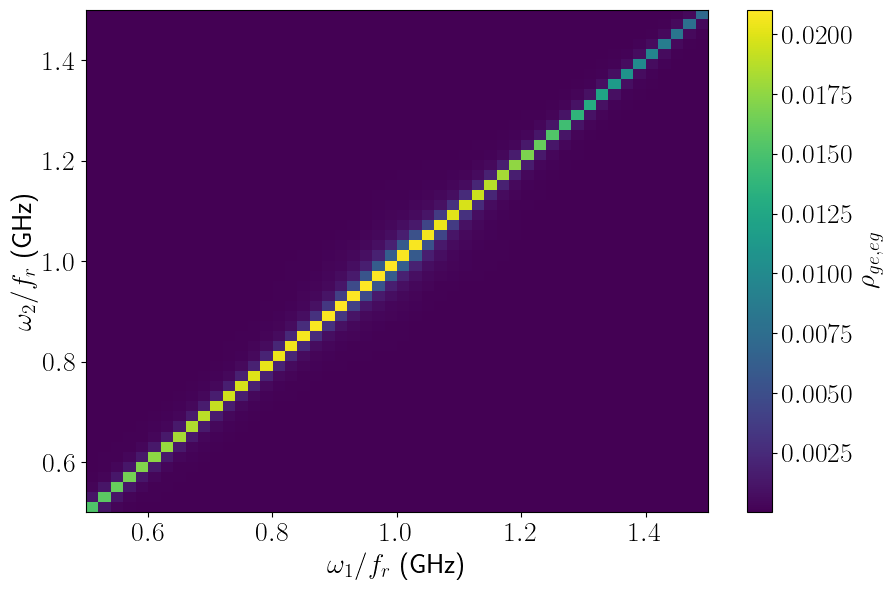

In [13]:
# Coherence Element of the Density Matrix for a Frequency Sweep

plt.figure(figsize=(9, 6))
rc('text',usetex=True)

cp = plt.imshow(
    Rho_coll_O,  # negative heat current for display
    extent=(w_vals.min(), w_vals.max(), w_vals.min(), w_vals.max()),
    aspect='auto',
    origin='lower'
)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel(r'$\omega_1/f_r$ (GHz)', fontsize=20)
plt.ylabel(r'$\omega_2/f_r$ (GHz)', fontsize=20)

cbar = plt.colorbar(cp)
# Imposto la label con fontsize
cbar.set_label(r'$\rho_{ge, eg}$', fontsize=20)
# Regolo la dimensione dei tick
cbar.ax.tick_params(labelsize=20)
plt.tight_layout()